## Preproccesing Data (Extracting Data)
### Meteorite Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)
print(df_meteorite.shape)
df_meteorite.head()

(38116, 7)


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [2]:
# Read Natural Disaster data
# ND = Natural Disaster
df_NDOriginal= pd.read_csv("natural_disaster.csv")
# df_NDOriginal.dropna().head()

In [3]:
# Create new dateframe with only necessary columns
df_ND = pd.DataFrame({'Year':df_NDOriginal['Incident Begin Date'],
                   'Incident Type':df_NDOriginal['Incident Type'], 
                   'Title':df_NDOriginal['Title'],
                   'Declared County':df_NDOriginal['Declared County/Area']})

df_ND['Year'] = (pd.to_datetime(df_ND['Year'])).dt.year
# drop any row with NAN value
df_ND = df_ND.dropna()

print(df_ND.shape)
df_ND.head()

(48193, 4)


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


<hr />

## Observing Data

### Observe number of natural disasters occured per year (1959 ~ 2018)

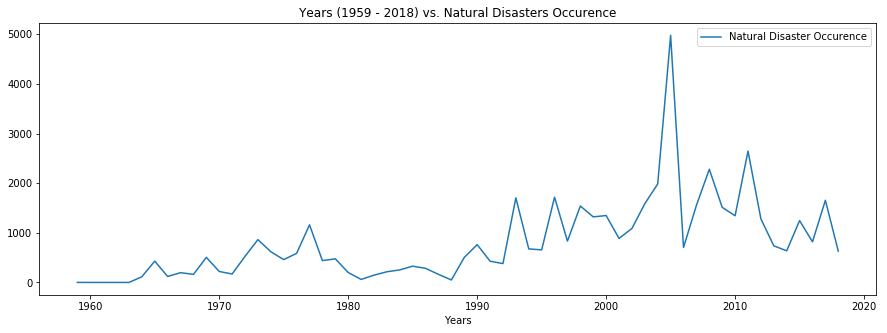

In [4]:
# Sort natural disaster data frame by type of disasters
df_ND = df_ND.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ND['Year'].values

minYear = years[0]
maxYear = years[-1]
years_freq = [0] * (maxYear - minYear + 1)

for x in years:
    years_freq[x-minYear] = years_freq[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

years_xy = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq})
years_xy.plot(x='Years', y='Natural Disaster Occurence', figsize=(15,5),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence")

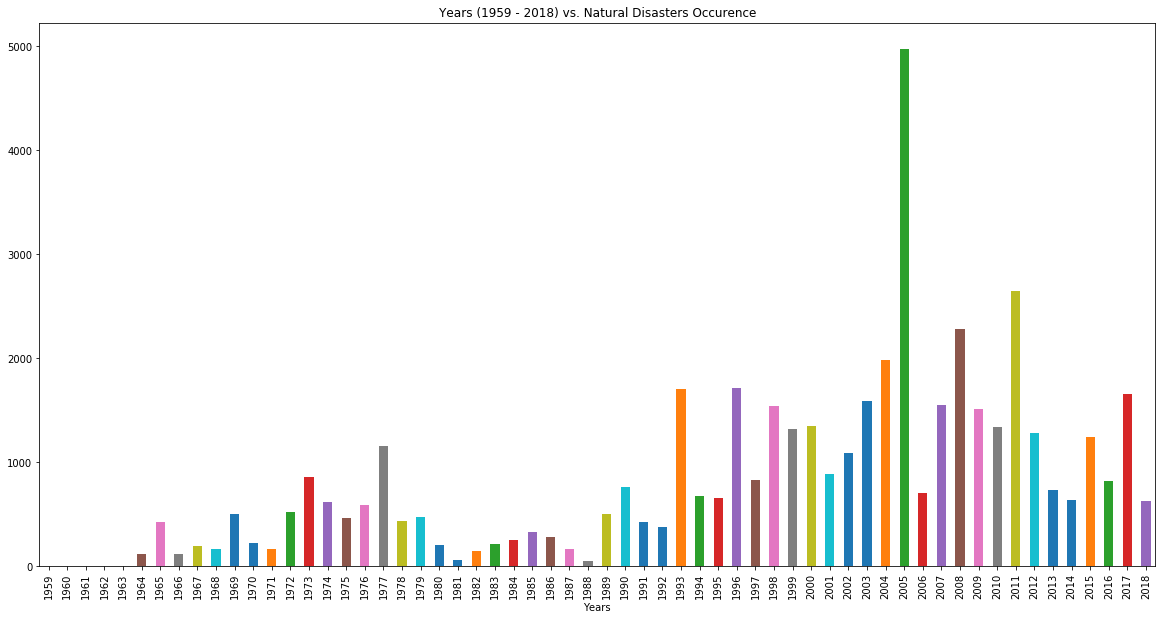

In [5]:
years_xy.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence", legend=False)

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured per year (1959 ~ 2018)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

In [10]:
df_meteorite['year'].values

df_meteoYear = df_meteorite.sort_values(by=['year'])['year']

In [29]:
df_meteo_yr = [int(yr) for yr in df_meteoYear.value_counts().index]

In [28]:
df_meteo_counts = df_meteoYear.value_counts().values

In [54]:
counts = [(pair[0], pair[1]) for pair in zip(df_meteo_yr,df_meteo_counts)]
dm_yr = [yr for (yr,count) in counts if ((yr > 1960) & (yr < 2019))]
dm_cnt = [count for (yr,count) in counts if ((yr > 1960) & (yr < 2019))]

In [237]:
dm = pd.DataFrame({'year':dm_yr, 'total_count':dm_cnt})

<BarContainer object of 53 artists>

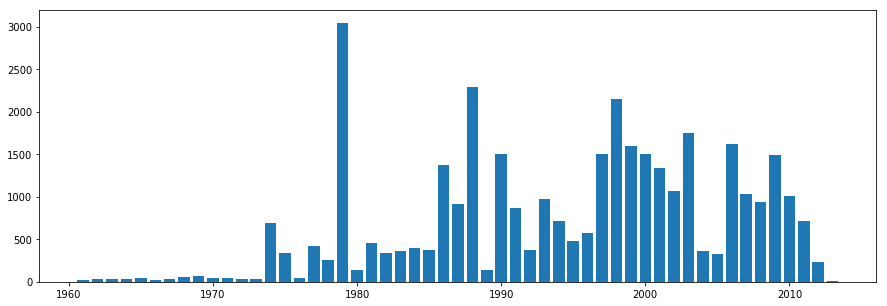

In [55]:
plt.figure(figsize=(15,5))
plt.bar(dm_yr, dm_cnt)

In [68]:
ndo = years_xy[(years_xy['Years'][:] > 1960) & (years_xy['Years'][:] <= 2013)]

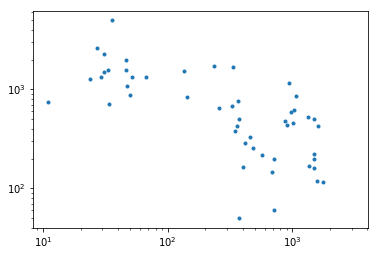

In [160]:
plt.loglog(dm_cnt, ndo['Natural Disaster Occurence'], '.')

In [82]:
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

In [85]:
df_m = df_meteorite[(df_meteorite['year'][:] > 1960) & (df_meteorite['year'][:] <= 2013)]

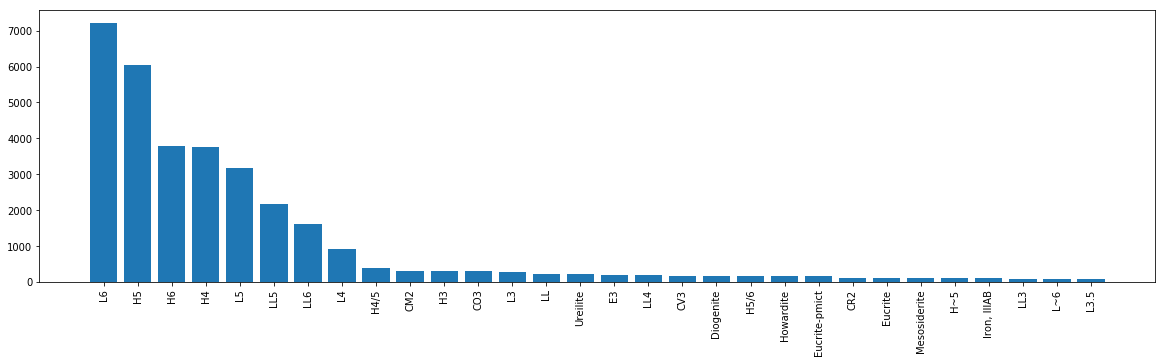

In [153]:
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

In [164]:
ndo = ndo.rename(columns={'Years': 'year'})

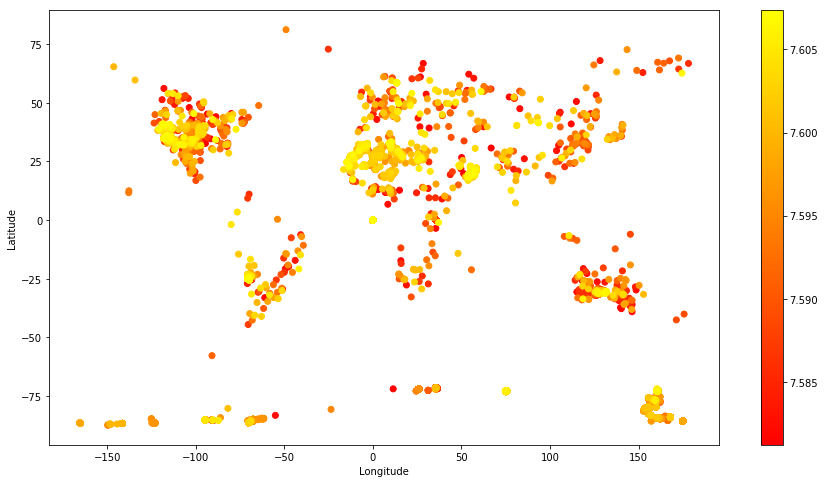

In [119]:
color_yr = [np.log(year) for year in df_m['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [117]:
color_mass = [np.log(mass) for mass in df_m['mass (g)']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


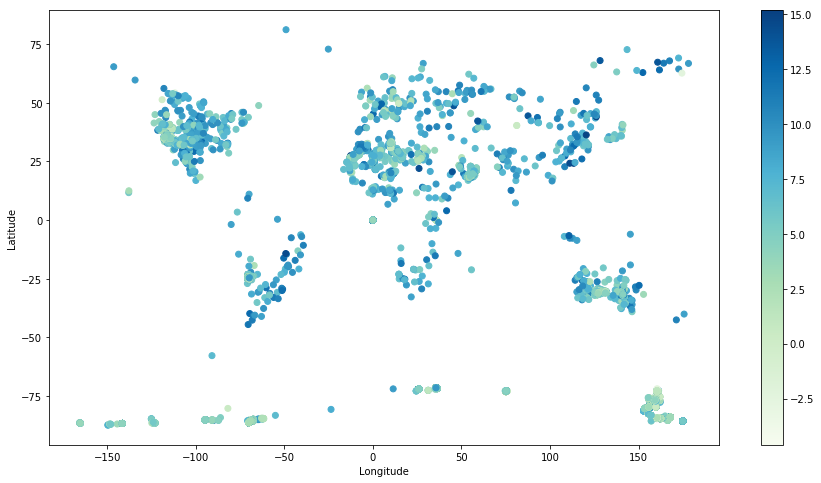

In [143]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [216]:
class_name = [] 
max_count = []
avg_mass = []
max_mass = []
for yr in ndo['year']:
    class_name.append(df_m.recclass[df_m['year']==yr].value_counts().index[0])
    max_count.append(df_m.recclass[df_m['year']==yr].value_counts()[0])
    max_mass.append(max(df_m['mass (g)'][df_m['year']==yr].values))
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==yr].values))

In [231]:
dm = dm[(dm['year'][:]>1960) & (dm['year'][:] <= 2013) ]

In [238]:
final = pd.DataFrame({'year':ndo['year'], 
                      'ndo':ndo['Natural Disaster Occurence'], 
                      'max_class':class_name, 
                      'max_count':max_count,
                      'avg_mass':avg_mass,
                      'max_mass':max_mass})
final = final.merge(dm, on='year')

In [239]:
final.head()

,year,ndo,max_class,max_count,avg_mass,max_mass,total_count
0,1961,0,H5,7,22980.240741,283000.0,27
1,1962,0,L6,8,15354.877778,100000.0,36
2,1963,0,L6,10,11858.309091,132700.0,33
3,1964,115,H5,5,113838.980645,3000000.0,31
4,1965,429,L6,7,22251.852174,450000.0,46


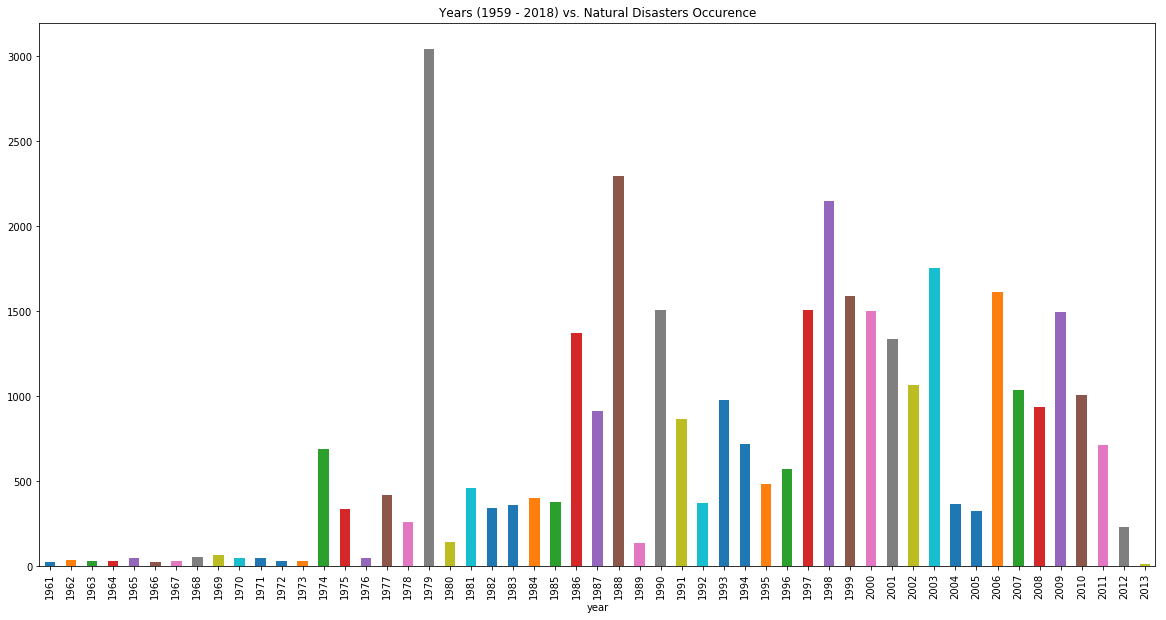

In [240]:
final.plot(x='year', y='total_count', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence", legend=False)